In [193]:
import numpy as np
import pandas as pd
import seaborn as sns  

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler
DATA_DIR = '../data/'
PLOT_DIR = '../plot/'

In [41]:
# Read Data
df_house = pd.read_csv(DATA_DIR+'train.csv')
df_house.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20254 entries, 0 to 20253
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            20254 non-null  int64  
 1   title                 20254 non-null  object 
 2   address               20254 non-null  object 
 3   property_name         20254 non-null  object 
 4   property_type         20254 non-null  object 
 5   tenure                18531 non-null  object 
 6   built_year            19332 non-null  float64
 7   num_beds              20174 non-null  float64
 8   num_baths             19820 non-null  float64
 9   size_sqft             20254 non-null  int64  
 10  floor_level           3508 non-null   object 
 11  furnishing            20254 non-null  object 
 12  available_unit_types  18813 non-null  object 
 13  total_num_units       14602 non-null  float64
 14  property_details_url  20254 non-null  object 
 15  lat                

## ------------------num_beds-----------------

In [316]:
df00 = df_house.copy()

In [319]:
df00['num_beds']

0        3.0
1        4.0
2        4.0
3        3.0
4        2.0
        ... 
20249    2.0
20250    2.0
20251    4.0
20252    3.0
20253    4.0
Name: num_beds, Length: 20254, dtype: float64

## ------------------floor_level------------------

In [61]:
fl = df_house['floor_level'].copy()

In [74]:
fl = fl.fillna('null')

In [75]:
fl.unique()

array(['null', 'low', 'ground', 'high', 'penthouse', 'mid',
       'mid (25 total)', 'top', 'ground (9 total)', 'high (70 total)',
       'low (23 total)', 'low (17 total)', 'high (23 total)',
       'high (10 total)', 'high (25 total)', 'high (9 total)',
       'high (17 total)', 'mid (9 total)'], dtype=object)

In [83]:
fl.value_counts()

null                16746
high                 1674
low                   719
mid                   705
ground                178
top                   116
penthouse              97
ground (9 total)        4
high (70 total)         4
low (17 total)          2
high (25 total)         2
mid (25 total)          1
low (23 total)          1
high (23 total)         1
high (10 total)         1
high (9 total)          1
high (17 total)         1
mid (9 total)           1
Name: floor_level, dtype: int64

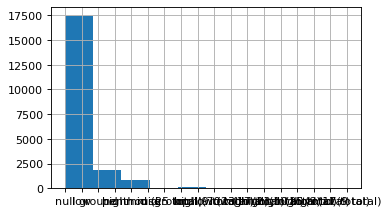

In [78]:
figure(figsize=(5, 3), dpi=80)
fl.hist()
plt.show()

In [91]:
mask = fl.str.contains('total')
fl[mask] = 'others'

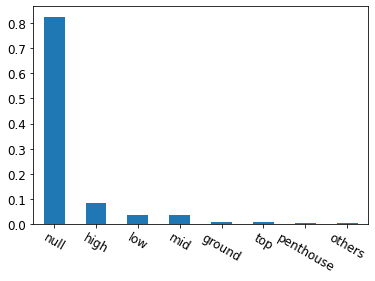

In [117]:
# figure(figsize=(8, 3), dpi=80)
# fl.hist(bins=range(len(fl.unique())+1))
fl.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=330, size=12)
plt.yticks(size=12)
plt.savefig(PLOT_DIR + 'floor_level_bar.png', dpi = 200, bbox_inches = 'tight')
plt.show()

## ------------------furnishing------------------

In [120]:
fns = df_house['furnishing'].copy()
fns.unique()

array(['unspecified', 'partial', 'unfurnished', 'fully', 'na'],
      dtype=object)

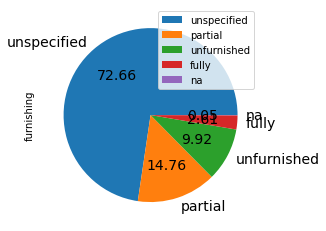

In [138]:
# plt.figure(figsize=(20, 6.5))
fns.value_counts(normalize=True).plot.pie(autopct='%.2f', fontsize=14,)
plt.legend(loc='upper right')
# plt.legend(loc='upper right', bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.xticks(size=16)
# plt.yticks(size=16)
plt.savefig(PLOT_DIR + 'furnishing_pie.png', dpi = 200, bbox_inches = 'tight')
plt.show()

## ------------------available_unit_types------------------

In [139]:
aut = df_house['available_unit_types'].copy()

In [142]:
aut.unique()

array([nan, '1, 2, 3, 4, 5, 6 br', 'studio, 3, 4, 5, 6 br',
       'studio, 1, 2, 3, 4 br', 'studio, 1, 2, 3, 4, 5 br',
       '2, 3, 4, 5, 6, 7 br', '1, 2, 3, 4 br',
       'studio, 1, 2, 3, 4, 5, 6, 7, 8, 9 br', '3 br', 'studio, 1 br',
       '1, 2, 3, 4, 5 br', 'studio, 4, 5, 6, 7 br',
       'studio, 1, 2, 3, 4, 5, 6 br', '5 br', 'studio, 1, 2, 3 br',
       '2, 3, 4 br', '1, 2, 3, 4, 5, 8 br',
       'studio, 2, 3, 4, 5, 6, 7, 8, 9 br', 'studio, 2, 3, 4 br',
       '1, 2, 3, 4, 6 br', '1, 3 br', '1, 2, 3 br', '1, 3, 4 br',
       '2, 3, 4, 5 br', '4, 5, 6, 7, 8 br', 'studio, 2, 3, 4, 5 br',
       '3, 4, 5, 6, 7, 8 br', '1, 2 br', '2, 3, 4, 5, 6, 7, 8, 9, 10 br',
       '2, 3 br', '1, 2, 4, 5, 6, 7 br', '4, 5 br',
       '1, 2, 3, 4, 5, 6, 7 br', '4, 5, 6 br', '3, 4, 5 br', '3, 7 br',
       '3, 4 br', '2, 3, 4, 6 br', '2, 3, 4, 5, 6 br',
       'studio, 1, 2, 3, 4, 5, 6, 7, 10 br', '5, 6 br', '1, 2, 3, 5 br',
       'studio, 1, 2, 3, 5 br', '3, 4, 5, 6 br', '3, 4, 6 br',
       '

In [144]:
aut.describe()

count                        18813
unique                         190
top       studio, 1, 2, 3, 4, 5 br
freq                          2223
Name: available_unit_types, dtype: object

## ------------------total_num_units------------------

In [145]:
tnu = df_house['total_num_units'].copy()

In [146]:
tnu.describe()

count    14602.000000
mean       376.253938
std        346.882474
min          4.000000
25%        106.000000
50%        296.000000
75%        561.000000
max       2612.000000
Name: total_num_units, dtype: float64

## ------------------Latitude------------------

In [4]:
print(df_house[['lat', 'lng']].describe())

                lat           lng
count  20254.000000  20254.000000
mean       1.434282    103.855356
std        1.558472      3.593441
min        1.239621    -77.065364
25%        1.307329    103.806576
50%        1.329266    103.841552
75%        1.372461    103.881514
max       69.486768    121.023232


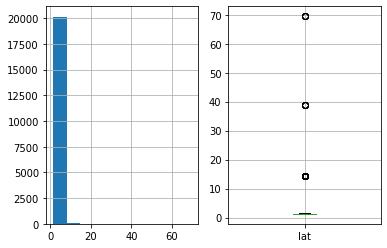

In [7]:
fig,axes=plt.subplots(1,2)

df_house['lat'].hist(ax=axes[0])
df_house[['lat']].boxplot(ax=axes[1])
# plt.savefig('./stationClocks/' + station + '.ps', dpi = 200)
plt.show()

# how to identify and process outliers: https://blog.csdn.net/weixin_42568012/article/details/103805091
# https://xuzhiwei.blog.csdn.net/article/details/121155940?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-121155940-blog-103805091.pc_relevant_layerdownloadsortv1&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-121155940-blog-103805091.pc_relevant_layerdownloadsortv1&utm_relevant_index=1

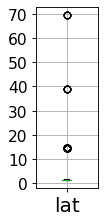

In [108]:

figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house[['lat']].boxplot()
plt.savefig(PLOT_DIR + 'box_lat.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

# how to identify and process outliers: https://blog.csdn.net/weixin_42568012/article/details/103805091
# https://xuzhiwei.blog.csdn.net/article/details/121155940?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-121155940-blog-103805091.pc_relevant_layerdownloadsortv1&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-121155940-blog-103805091.pc_relevant_layerdownloadsortv1&utm_relevant_index=1

20141 0.9944208551397254


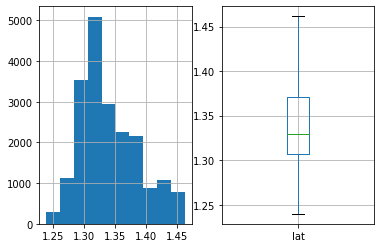

In [33]:
# just filter outliers out
col = df_house['lat'].copy()
iqr = col.quantile(0.75)-col.quantile(0.25)
u_th = col.quantile(0.75) + 1.5*iqr # upper bound
l_th = col.quantile(0.25) - 1.5*iqr # lower bound
df_house_1 = df_house[(col <= u_th) & (col >= l_th)]
print(len(df_house_1), len(df_house_1)/len(df_house))
fig,axes=plt.subplots(1,2)
df_house_1['lat'].hist(ax=axes[0])
df_house_1[['lat']].boxplot(ax=axes[1])
plt.show()

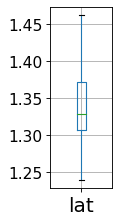

In [109]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house_1[['lat']].boxplot()
plt.savefig(PLOT_DIR + 'box_lat_remove_outliers.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

In [118]:
# just filter outliers out
col = df_house['lat'].copy()
iqr = col.quantile(0.75)-col.quantile(0.25)
u_th = col.quantile(0.75) + 1.5*iqr # upper bound
l_th = col.quantile(0.25) - 1.5*iqr # lower bound
print(col.shape)
print(u_th, l_th)
print(df_house[(col <= u_th) & (col >= l_th)].shape)
print(df_house[(col <= 1.50) & (col >= 1.23)].shape)
# 最西1.222008, 103.606662， 最东1.342828, 104.084567， 最北1.470505, 103.814716， 最南1.168461, 103.735065

(20254,)
1.4701607125000002 1.2096294125
(20141, 21)
(20141, 21)


## ------------------Longitude------------------

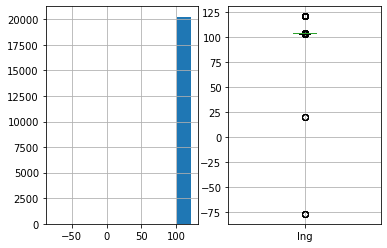

In [50]:
fig,axes=plt.subplots(1,2)
df_house['lng'].hist(ax=axes[0])
df_house[['lng']].boxplot(ax=axes[1])
plt.show()

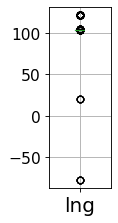

In [110]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house[['lng']].boxplot()
plt.savefig(PLOT_DIR + 'box_lng.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

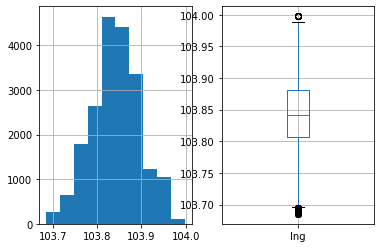

In [47]:
fig,axes=plt.subplots(1,2)
df_house_1['lng'].hist(ax=axes[0])
df_house_1[['lng']].boxplot(ax=axes[1])
plt.show()

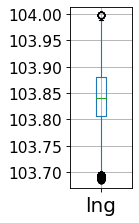

In [111]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house_1[['lng']].boxplot()
plt.savefig(PLOT_DIR + 'box_lng_remove_outliers.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

20082 0.991507850301175


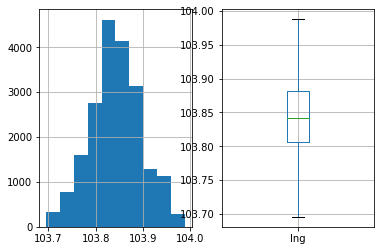

103.69550615791069 103.9916711852536
(20141, 21)
(20082, 21)
(20141, 21)


In [57]:
# just filter outliers out
col = df_house_1['lng'].copy()
iqr = col.quantile(0.75)-col.quantile(0.25)
u_th = col.quantile(0.75) + 1.5*iqr # upper bound
l_th = col.quantile(0.25) - 1.5*iqr # lower bound
df_house_2 = df_house_1[(col <= u_th) & (col >= l_th)]
print(len(df_house_2), len(df_house_2)/len(df_house))
fig,axes=plt.subplots(1,2)
df_house_2['lng'].hist(ax=axes[0])
df_house_2[['lng']].boxplot(ax=axes[1])
plt.show()

print(l_th, u_th)
print(df_house_1.shape)
print(df_house_1[(col <= u_th) & (col >= l_th)].shape)
print(df_house_1[(col <= 104.6) & (col >= 103.38)].shape)

[[0.78742913 0.48487575]
 [0.5990961  0.61646463]
 [0.26649593 0.68554269]
 ...
 [0.34393528 0.48368521]
 [0.90616158 0.38035302]
 [0.34393528 0.48368521]]
1.0 0.0
1.0 0.0


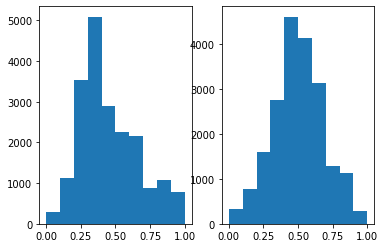

In [306]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
lat_lng = df_house_2[['lat', 'lng']].to_numpy()
minmax.fit(lat_lng)
lat_lng_minmax = minmax.transform(lat_lng)
print(lat_lng_minmax)
print(lat_lng_minmax[:, 0].max(), lat_lng_minmax[:, 0].min())
print(lat_lng_minmax[:, 1].max(), lat_lng_minmax[:, 1].min())

fig,axes=plt.subplots(1,2)
plt.subplot(1, 2, 1)
plt.hist(lat_lng_minmax[:, 0])
plt.subplot(1, 2, 2)
plt.hist(lat_lng_minmax[:, 1])
plt.show()
df_house_3 = df_house_2.copy()

df_house_3.loc[:, ['lat', 'lng']] = lat_lng_minmax

## ------------------Elevation------------------

In [50]:
df_house['elevation'].unique()

array([0], dtype=int64)

## ------------------Subzone------------------

In [51]:
subzone_uniq = df_house['subzone'].unique()
print(len(subzone_uniq))
print(df_house['subzone'].value_counts())

245
moulmein            656
mountbatten         532
nassim              493
upper paya lebar    414
yishun east         397
                   ... 
paya lebar north      1
monk's hill           1
nee soon              1
people's park         1
bukit merah           1
Name: subzone, Length: 244, dtype: int64


In [307]:
print(len(df_house_3))
df_house_4 = df_house_3.dropna(subset=['subzone'])
print(len(df_house_4))

20082
20082


In [148]:
sz = df_house['subzone'].copy()

In [162]:
sz.describe()

count        20141
unique         244
top       moulmein
freq           656
Name: subzone, dtype: object

moulmein            656
mountbatten         532
nassim              493
upper paya lebar    414
yishun east         397
                   ... 
paya lebar north      1
monk's hill           1
nee soon              1
people's park         1
bukit merah           1
Name: subzone, Length: 244, dtype: int64
[656 532 493 414 397 377 331 308 301 300 283 263 257 237 234 233 226 225
 214 205 202 199 194 193 191 186 176 173 172 171 169 167 167 160 152 146
 145 144 143 142 137 135 132 131 130 130 128 127 126 119 115 112 111 109
 109 109 109 108 108 107 106 106 105 104 102 101 100  99  99  98  97  95
  95  95  93  93  93  90  89  89  88  84  84  83  82  81  81  80  79  77
  77  77  74  74  74  74  73  73  70  69  68  68  65  65  65  64  64  64
  63  63  62  61  60  59  58  58  58  58  58  57  57  56  55  55  53  52
  52  52  51  50  50  49  47  46  46  45  45  44  44  44  43  43  42  42
  42  42  41  39  39  39  38  38  38  38  38  36  36  36  36  36  35  34
  34  33  33  31  31  30  29  29  29  

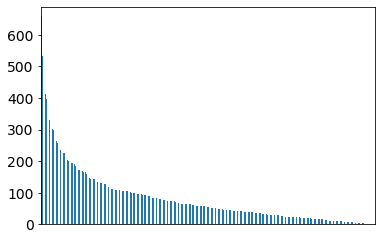

In [171]:
counts = sz.value_counts()
print(counts)
print(counts.values)


ax1 = counts.plot.bar()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax1.set_xlabel('subzone', fontsize=20)
plt.yticks(size = 14)
plt.xticks(size = 18)
plt.savefig(PLOT_DIR + 'subzone_bar.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [ ]:
plt.xticks(rotation=330, size=12)
plt.yticks(size=12)
plt.savefig(PLOT_DIR + 'floor_level_bar.png', dpi = 200, bbox_inches = 'tight')
plt.show()

## ------------------Planning Area------------------

In [53]:
subzone_uniq = df_house['planning_area'].unique()
print(len(subzone_uniq))
print(df_house['planning_area'].value_counts())

44
bukit timah                1320
novena                      977
serangoon                   932
bedok                       907
marine parade               837
kallang                     828
tanglin                     809
yishun                      800
queenstown                  737
ang mo kio                  730
downtown core               707
woodlands                   657
sengkang                    649
hougang                     629
bukit merah                 600
toa payoh                   583
bukit batok                 576
clementi                    543
pasir ris                   524
sembawang                   524
punggol                     517
tampines                    484
geylang                     462
river valley                418
jurong west                 408
outram                      398
choa chu kang               375
bukit panjang               307
southern islands            283
newton                      276
museum                      257
bisha

In [308]:
print(len(df_house_4))
df_house_5 = df_house_4.dropna(subset=['planning_area'])
print(len(df_house_5))

20082
20082


In [165]:
pa = df_house['planning_area'].copy()
pa.describe()

count           20141
unique             43
top       bukit timah
freq             1320
Name: planning_area, dtype: object

bukit timah                1320
novena                      977
serangoon                   932
bedok                       907
marine parade               837
kallang                     828
tanglin                     809
yishun                      800
queenstown                  737
ang mo kio                  730
downtown core               707
woodlands                   657
sengkang                    649
hougang                     629
bukit merah                 600
toa payoh                   583
bukit batok                 576
clementi                    543
pasir ris                   524
sembawang                   524
punggol                     517
tampines                    484
geylang                     462
river valley                418
jurong west                 408
outram                      398
choa chu kang               375
bukit panjang               307
southern islands            283
newton                      276
museum                      257
bishan  

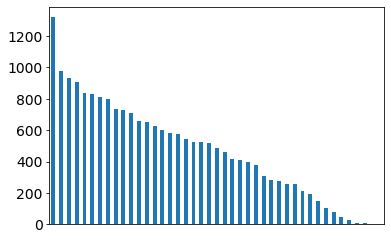

In [164]:
counts_pa = pa.value_counts()
print(counts_pa)

ax1 = counts_pa.plot.bar()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax1.set_xlabel('planning_area', fontsize=20)
plt.yticks(size = 14)
plt.xticks(size = 18)
plt.savefig(PLOT_DIR + 'planning_area_bar.png', dpi = 200, bbox_inches = 'tight')
plt.show()

## ------------------Price------------------

In [309]:
print(df_house_5['price'].describe())

count    2.008200e+04
mean     5.251269e+06
std      2.791625e+08
min      0.000000e+00
25%      8.190000e+05
50%      1.674700e+06
75%      3.252900e+06
max      3.924243e+10
Name: price, dtype: float64


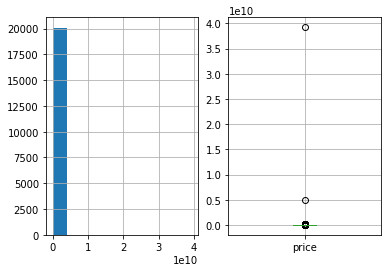

In [310]:
fig,axes=plt.subplots(1,2)
df_house_5['price'].hist(ax=axes[0])
df_house_5[['price']].boxplot(ax=axes[1])
plt.show()

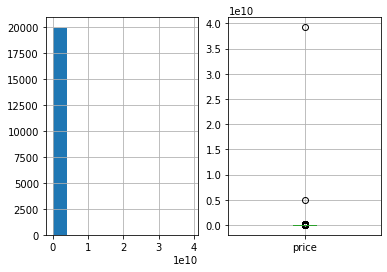

In [311]:
col = df_house_5['price']
df_house_5 = df_house_5[col != 0]
fig,axes=plt.subplots(1,2)
df_house_5['price'].hist(ax=axes[0])
df_house_5[['price']].boxplot(ax=axes[1])
plt.show()

# col = df_house_5['price']
# df_house_5 = df_house_5[col < 1e13]
# fig,axes=plt.subplots(1,2)
# df_house_5['price'].hist(ax=axes[0])
# df_house_5[['price']].boxplot(ax=axes[1])
# plt.show()

18051 19981 0.9034082378259346


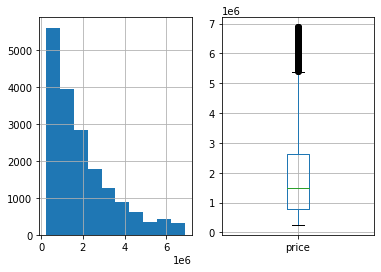

In [312]:
# just filter outliers out
col = df_house_5['price']
iqr = col.quantile(0.75)-col.quantile(0.25)
u_th = col.quantile(0.75) + 1.5*iqr # upper bound
l_th = col.quantile(0.25) - 1.5*iqr # lower bound
df_house_6 = df_house_5[(col <= u_th) & (col >= l_th)]
df_house_6 = df_house_5[(col <= u_th) & (col >= l_th)]
print(len(df_house_6), len(df_house_5), len(df_house_6)/len(df_house_5))
fig,axes=plt.subplots(1,2)
df_house_6['price'].hist(ax=axes[0])
df_house_6[['price']].boxplot(ax=axes[1])
plt.show()

In [20]:
# df_house_6.to_csv("train_preprocess_last5_lg.csv")

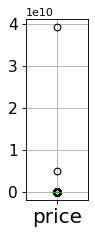

In [215]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house[['price']].boxplot()
plt.savefig(PLOT_DIR + 'box_price_raw.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

In [178]:
# just filter outliers out
pri = df_house['price'].copy()
iqr = pri.quantile(0.75)-pri.quantile(0.25)
u_th = pri.quantile(0.75) + 1.5*iqr # upper bound
l_th = pri.quantile(0.25) - 1.5*iqr # lower bound
pri1 = pri[(pri <= u_th) & (pri >= l_th)].copy()

print(len(pri1), len(pri1)/len(df_house['price'].copy()))
print(l_th, u_th)
print(pri.shape)
print(pri[(pri <= u_th) & (pri >= l_th)].shape)
print(pri[(pri <= 1e8) & (pri >= 1)].shape)

18314 0.9042164510713933
-2816100.0 6877500.0
(20254,)
(18314,)
(20147,)


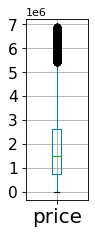

In [216]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house[(pri <= u_th) & (pri >= l_th)][['price']].boxplot()
plt.savefig(PLOT_DIR + 'box_price_iqr.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

C:\Users\leiga\AppData\Local\Temp\ipykernel_34504\475109811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_house[(pri <= u_th) & (pri >= l_th)][['price']])


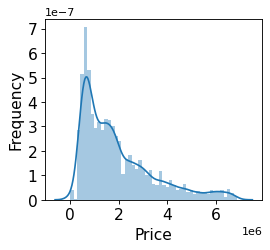

In [227]:
figure(figsize=(3.5,3), dpi=80)
# df_house[(pri <= u_th) & (pri >= l_th)][['price']].plot.hist()
ax = sns.distplot(df_house[(pri <= u_th) & (pri >= l_th)][['price']])
# ax.set(xlabel='Price', ylabel='Frequency')
plt.xlabel("Price", size=14)
plt.ylabel("Frequency", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.savefig(PLOT_DIR + 'dist_price_iqr.png', dpi = 200, bbox_inches = 'tight')
plt.show()


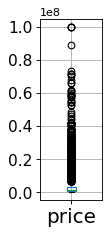

In [217]:
figure(figsize=(1, 3), dpi=80)
# plt.ylabel('Value', fontdict={'family' : 'Times New Roman', 'size'   : 16})
# plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(size = 14)
plt.xticks(size = 18)
# plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
df_house[(pri <= 1e8) & (pri >= 1)][['price']].boxplot()
plt.savefig(PLOT_DIR + 'box_price_hand.png', dpi = 200, bbox_inches = 'tight')
# plt.savefig(PLOT_DIR + 'lat.pdf', dpi = 200)
plt.show()

C:\Users\leiga\AppData\Local\Temp\ipykernel_34504\3547041786.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_house[(pri <= 1e8) & (pri >= 1)][['price']])


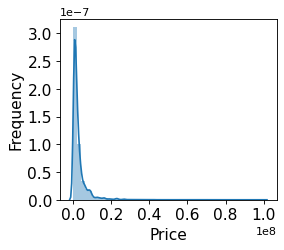

In [226]:
figure(figsize=(3.5,3), dpi=80)
# df_house[(pri <= u_th) & (pri >= l_th)][['price']].plot.hist()
ax = sns.distplot(df_house[(pri <= 1e8) & (pri >= 1)][['price']])
# ax.set(xlabel='Price', ylabel='Frequency')
plt.xlabel("Price", size=14)
plt.ylabel("Frequency", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.savefig(PLOT_DIR + 'dist_price_hand.png', dpi = 200, bbox_inches = 'tight')
plt.show()

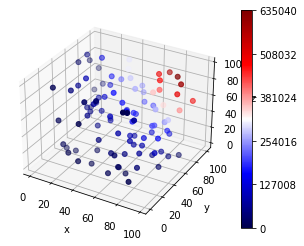

In [228]:
import matplotlib.colors 
import matplotlib.ticker
import matplotlib.pyplot as plt
import random
# 1.0 初始化数据
# f(x,y,z) = v
# 其中x,y,z为随机数，v=x*y*z
x = [random.randint(0,100) for i in range(0,100)]
y = [random.randint(0,100) for i in range(0,100)]
z = [random.randint(0,100) for i in range(0,100)]
v = [x[i]*y[i]*z[i] for i in range(0,100)]
# 1.1 根据各个点的值(v[])，设置点的颜色值，每个点的颜色使用一个rgb三维的元组表示，例如，若想让点显示为红色，则颜色值为(1.0,0,0)
# 设置各个点的颜色
# 每个点的颜色值按照colormap("seismic",100)进行设计，其中colormap类型为"seismic"，共分为100个级别(level)
min_v = min(v)
max_v = max(v)
color = [plt.get_cmap("seismic", 100)(int(float(i-min_v)/(max_v-min_v)*100)) for i in v]

# 2.0 显示三维散点图
# 新建一个figure()
fig = plt.figure()
# 在figure()中增加一个subplot，并且返回axes
ax = fig.add_subplot(111,projection='3d')
# 设置colormap，与上面提到的类似，使用"seismic"类型的colormap，共100个级别
plt.set_cmap(plt.get_cmap("seismic", 100))
# 绘制三维散点，各个点颜色使用color列表中的值，形状为"."
im = ax.scatter(x, y, z, s=100,c=color,marker='.')
# 2.1 增加侧边colorbar
# 设置侧边colorbar，colorbar上显示的值使用lambda方程设置
fig.colorbar(im, format=matplotlib.ticker.FuncFormatter(lambda x,pos:int(x*(max_v-min_v)+min_v)))
# 2.2 增加坐标轴标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# 2.3显示
plt.show()


20141
18209


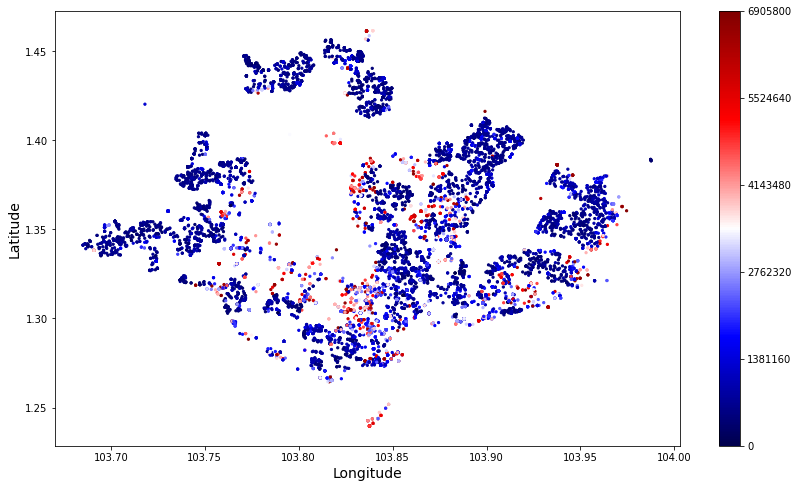

In [246]:

pri2 = df_house_1['price'].copy()
print(len(pri2))
iqr = pri2.quantile(0.75)-pri2.quantile(0.25)
u_th = pri2.quantile(0.75) + 1.5*iqr # upper bound
l_th = pri2.quantile(0.25) - 1.5*iqr # lower bound

df_2 = df_house_1.copy()[(pri2 <= u_th) & (pri2 >= l_th)]
print(len(df_2))
pri_arr = df_2['price'].to_numpy()
lat_arr = df_2['lat'].to_numpy()
lng_arr = df_2['lng'].to_numpy()
min_v = min(pri_arr)
max_v = max(pri_arr)
color = [plt.get_cmap("seismic", 100)(int(float(i-min_v)/(max_v-min_v)*100)) for i in pri_arr]

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
plt.set_cmap(plt.get_cmap("seismic", 100))
im = ax.scatter(lng_arr, lat_arr, s=20,c=color,marker='.')
fig.colorbar(im, format=matplotlib.ticker.FuncFormatter(lambda x,pos:int(x*(max_v-min_v)+min_v)))
ax.set_xlabel('Longitude', size=14)
ax.set_ylabel('Latitude', size=14)
plt.savefig(PLOT_DIR + 'pric_lat_lng_map.png', dpi = 200, bbox_inches = 'tight')
plt.show()



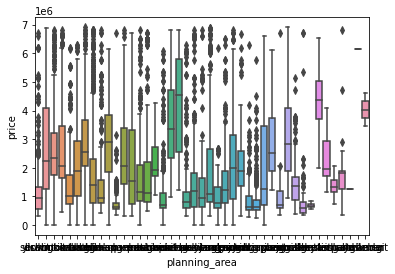

In [253]:
data = df_2[['price','planning_area']]
fig = sns.boxplot(x='planning_area', y="price", data=data)

Index(['paya lebar', 'orchard', 'southern islands', 'mandai', 'newton',
       'marine parade', 'river valley', 'tanglin', 'singapore river',
       'bukit timah', 'serangoon', 'novena', 'downtown core', 'clementi',
       'central water catchment', 'museum', 'kallang', 'outram', 'changi',
       'ang mo kio', 'bedok', 'rochor', 'tengah', 'hougang', 'lim chu kang',
       'toa payoh', 'sembawang', 'queenstown', 'pasir ris', 'bukit merah',
       'bukit batok', 'geylang', 'bishan', 'yishun', 'bukit panjang',
       'sengkang', 'tampines', 'punggol', 'seletar', 'choa chu kang',
       'woodlands', 'jurong west', 'jurong east'],
      dtype='object', name='planning_area')


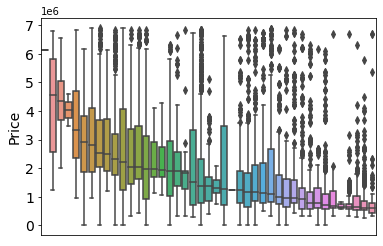

In [275]:
# Find the order
data = df_2[['price','planning_area']]
my_order = data.groupby(by=["planning_area"])["price"].median().sort_values(ascending = False).index
# my_order = data.groupby(by=["planning_area"])["price"].median().iloc[::-1].index
print(my_order)
ax = sns.boxplot(x='planning_area', y='price', data=data, order=my_order)
ax.axes.xaxis.set_visible(False)
plt.yticks(size = 14)
ax.set_ylabel('Price', size=14)
plt.xticks(size = 18)
plt.savefig(PLOT_DIR + 'price_planning_area.png', dpi = 200, bbox_inches = 'tight')
plt.show()

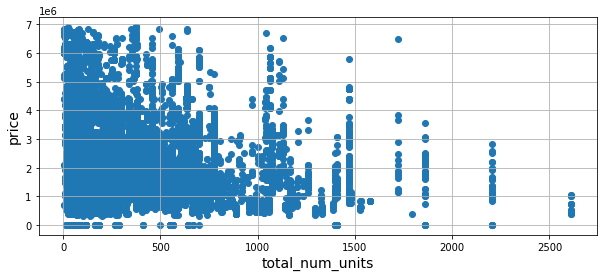

In [281]:
df_3 = df_2.dropna(subset=['total_num_units'])
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(df_3['total_num_units'], df_3['price'])
ax1.set_xlabel('total_num_units', size=14)
ax1.set_ylabel('price', size=14)
plt.savefig(PLOT_DIR + 'price_units.png', dpi = 200, bbox_inches = 'tight')
plt.grid()

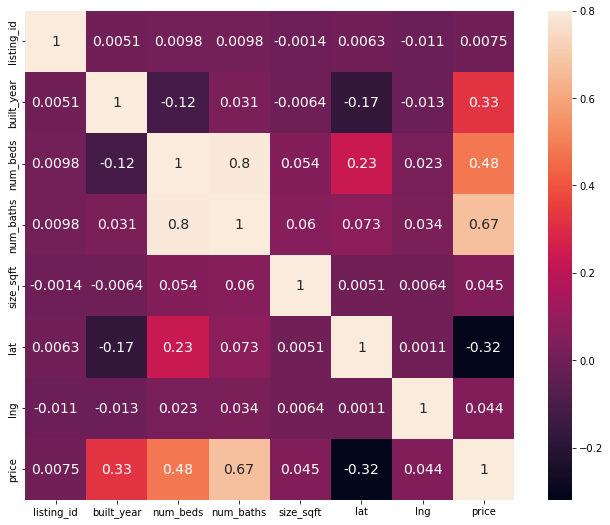

In [321]:
df_4 = df_2.drop(columns=['elevation', 'total_num_units'])
corrmat = df_4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, annot_kws={'fontsize': 14})
plt.savefig(PLOT_DIR + 'corr_hotmap.png', dpi = 200, bbox_inches = 'tight')

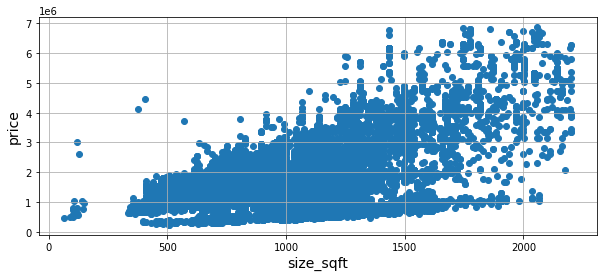

In [314]:
df5 = df_house_6.copy()
ss = df5['size_sqft']
iqr = ss.quantile(0.75)-ss.quantile(0.25)
u_th = ss.quantile(0.75) + 1.5*iqr # upper bound
l_th = ss.quantile(0.25) - 1.5*iqr # lower bound
df5 = df5[(ss <= u_th) & (ss >= l_th)]

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(df5['size_sqft'], df5['price'])
ax1.set_xlabel('size_sqft', size=14)
ax1.set_ylabel('price', size=14)
plt.savefig(PLOT_DIR + 'price_size_sqft.png', dpi = 200, bbox_inches = 'tight')
plt.grid()

# Test set

In [21]:
# Read Data
df_house_t = pd.read_csv('test.csv')
df_house_t.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
0,777912,1 bed condo for sale in the gazania,17 how sun drive,the gazania,condo,freehold,2022.0,1.0,1.0,463,NaN,unfurnished,"studio, 1, 2, 3, 4, 5 br",250.0,https://www.99.co/singapore/condos-apartments/...,1.344334,103.878690,0,upper paya lebar,serangoon
1,936612,3 bed condo for sale in vue 8 residence,95 pasir ris heights,vue 8 residence,Condo,99-year leasehold,2017.0,3.0,3.0,1033,high,unspecified,"studio, 1, 2, 3, 4, 5 br",463.0,https://www.99.co/singapore/condos-apartments/...,1.380281,103.943878,0,pasir ris west,pasir ris
2,995264,1 bed condo for sale in icon,10 gopeng street,icon,condo,99-year leasehold,2007.0,1.0,1.0,570,NaN,fully,"studio, 1, 2, 3 br",646.0,https://www.99.co/singapore/condos-apartments/...,1.294668,103.850074,0,bras basah,museum
3,477435,hdb flat for sale in 812b choa chu kang avenue 7,bukit batok / bukit panjang / choa chu kang (d23),keat hong colours,Hdb,99-year leasehold,2017.0,3.0,2.0,1216,NaN,unspecified,"1, 2, 3, 4, 5 br",968.0,https://www.99.co/singapore/hdb/keat-hong-colo...,1.373120,103.746094,0,keat hong,choa chu kang
4,222529,hdb flat for sale in 204 toa payoh north,balestier / toa payoh (d12),toa payoh spring,hdb 4 rooms,99-year leasehold,1973.0,3.0,2.0,936,NaN,unspecified,"1, 2, 3, 4 br",NaN,https://www.99.co/singapore/hdb/toa-payoh-spri...,1.341468,103.849047,0,braddell,toa payoh


In [22]:
df_house_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            7000 non-null   int64  
 1   title                 7000 non-null   object 
 2   address               6998 non-null   object 
 3   property_name         7000 non-null   object 
 4   property_type         7000 non-null   object 
 5   tenure                6363 non-null   object 
 6   built_year            6642 non-null   float64
 7   num_beds              6965 non-null   float64
 8   num_baths             6848 non-null   float64
 9   size_sqft             7000 non-null   int64  
 10  floor_level           1156 non-null   object 
 11  furnishing            7000 non-null   object 
 12  available_unit_types  6480 non-null   object 
 13  total_num_units       5100 non-null   float64
 14  property_details_url  7000 non-null   object 
 15  lat                  

[[0.47176326 0.62696259]
 [0.63371663 0.85017929]
 [0.24800573 0.52897285]
 ...
 [0.24547217 0.48329723]
 [0.28885866 0.73909835]
 [0.28450632 0.59527045]]
307.47387308930234 0.0
59.33355846174504 -618.9643911923636


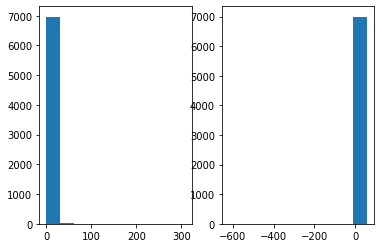

In [26]:
# minmax = MinMaxScaler()
lat_lng_t = df_house_t[['lat', 'lng']].to_numpy()
lat_lng_t_minmax = minmax.transform(lat_lng_t)
print(lat_lng_t_minmax)
print(lat_lng_t_minmax[:, 0].max(), lat_lng_t_minmax[:, 0].min())
print(lat_lng_t_minmax[:, 1].max(), lat_lng_t_minmax[:, 1].min())

fig,axes=plt.subplots(1,2)
plt.subplot(1, 2, 1)
plt.hist(lat_lng_t_minmax[:, 0])
plt.subplot(1, 2, 2)
plt.hist(lat_lng_t_minmax[:, 1])
plt.show()
df_house_t_1 = df_house_t.copy()

df_house_t_1.loc[:, ['lat', 'lng']] = lat_lng_t_minmax

In [28]:
df_house_t_1['subzone'] = df_house_t_1['subzone'].fillna('Not_Given')
df_house_t_1['planning_area'] = df_house_t_1['planning_area'].fillna('Not_Given')
df_house_t_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            7000 non-null   int64  
 1   title                 7000 non-null   object 
 2   address               6998 non-null   object 
 3   property_name         7000 non-null   object 
 4   property_type         7000 non-null   object 
 5   tenure                6363 non-null   object 
 6   built_year            6642 non-null   float64
 7   num_beds              6965 non-null   float64
 8   num_baths             6848 non-null   float64
 9   size_sqft             7000 non-null   int64  
 10  floor_level           1156 non-null   object 
 11  furnishing            7000 non-null   object 
 12  available_unit_types  6480 non-null   object 
 13  total_num_units       5100 non-null   float64
 14  property_details_url  7000 non-null   object 
 15  lat                  

In [29]:
df_house_t_1.to_csv("test_preprocess_last5_lg.csv")